# Code for linear Acceleration etc...

In [235]:
import numpy as np
import matplotlib.pyplot as plt

### example of linear decreasing time intervals and resulting rotation acceleration

In [236]:
def calcSpeedProfile(steps, shortInterval, longInterval, accel):
    intervals = np.ones(steps)*longInterval
    maxSpeedReachedAt = 0
    for index, val in enumerate(intervals[1:]):
        if (index < steps/2):
            intervals[index] = intervals[index-1]-accel
            if (intervals[index]< shortInterval):
                intervals[index] = shortInterval
                if maxSpeedReachedAt == 0:
                    maxSpeedReachedAt = index
        else:
            if (maxSpeedReachedAt != 0 and index < steps-maxSpeedReachedAt):
                intervals[index] = shortestInterval
            else:
                intervals[index] = intervals[index-1]+accel
                        
    return intervals

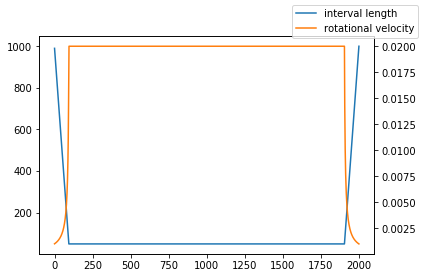

In [237]:
shortestInterval = 50 # 100 ms
longestInterval = 1000 # 1000 ms
acceleration = 10      # 10 ms
numberOfSteps = 2000

ints = calcSpeedProfile(numberOfSteps, shortestInterval, longestInterval, acceleration);

fig, ax = plt.subplots()
ax.plot(np.arange(numberOfSteps), ints, label="interval length", c = 'C0')
ax_r = ax.twinx()
ax_r.plot(np.arange(numberOfSteps), 1/ints, label="rotational velocity", c = 'C1')
fig.legend()

In [238]:
def calcLinearSpeedProfile(steps, shortInterval, longInterval, accel, rampLength):
    
    
    root_interval = 1/longInterval * np.sqrt((2*np.pi/200)/accel)
    
    intervals = np.ones(steps)*longInterval
    maxSpeedReachedAt = 0
    
    for index, val in enumerate(intervals[1:]):
        if (index < steps/2):
            intervals[index] = intervals[index-1]*(1-()2/(4*rampLength+1)))
            if (intervals[index] < shortInterval):
                intervals[index] = shortInterval
                if maxSpeedReachedAt == 0:
                    maxSpeedReachedAt = index
        else:
            if (maxSpeedReachedAt != 0 and index < steps-maxSpeedReachedAt):
                intervals[index] = shortestInterval
            else:
                pass
                #intervals[index] = intervals[index-1]*(1-(4*rampLength+1)/2)
                      
    print (maxSpeedReachedAt)
    return intervals

SyntaxError: invalid syntax (<ipython-input-238-d761ff1bdc11>, line 11)

In [ ]:
shortestInterval = 50 # 100 ms
longestInterval = 1000 # 1000 ms
acceleration = 100      # 10 ms
numberOfSteps = 2000
rampLength = 100

lin_ints = calcLinearSpeedProfile(numberOfSteps, shortestInterval, longestInterval, acceleration, rampLength);

fig, ax = plt.subplots()
ax.plot(np.arange(numberOfSteps), lin_ints, label="interval length", c = 'C0')
ax_r = ax.twinx()
ax_r.plot(np.arange(numberOfSteps), 1/lin_ints, label="rotational velocity", c = 'C1')
fig.legend()

In [ ]:
print(lin_ints)

## S-Curve Velocity with constant Jerk

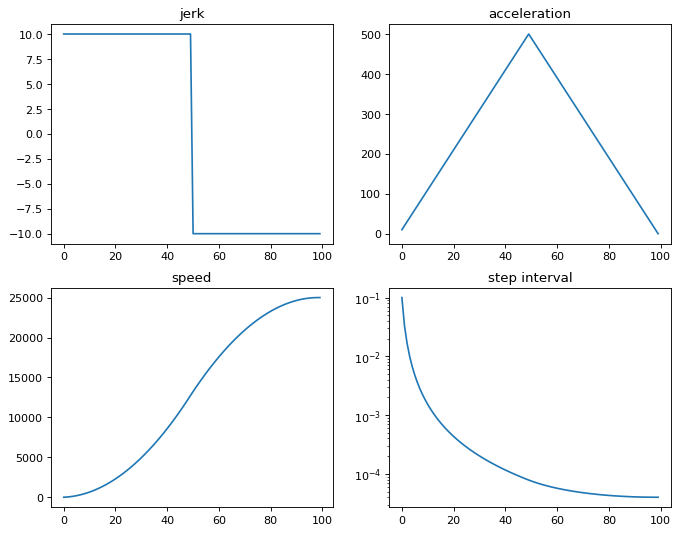

In [239]:
steps = 100
jerkIncrease = 10

jerk = np.zeros(steps)
for index, val in enumerate(jerk):
    if index < steps/2:
        jerk[index] = jerkIncrease
    
    if index >= steps/2:
        jerk[index] = -jerkIncrease

fig, ax = plt.subplots(2,2, dpi = 80, figsize = (10,8))
ax[0,0].plot(np.arange(steps), jerk)
ax[0,0].set_title('jerk')

acceleration = np.cumsum(jerk)
ax[0,1].plot(np.arange(steps), acceleration)
ax[0,1].set_title('acceleration')


speed = np.cumsum(acceleration)
ax[1,0].plot(np.arange(steps), speed)
ax[1,0].set_title('speed')


intervals = 1/speed
ax[1,1].plot(np.arange(steps), abs(intervals))
ax[1,1].set_yscale('log')
ax[1,1].set_title('step interval');


In [240]:
accel = np.arange(0,11,1)
accel = np.append(accel, np.arange(10,-11,-1))
accel = np.append(accel, np.arange(-10,1,1))

In [241]:
accel

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4,
        -5,  -6,  -7,  -8,  -9, -10, -10,  -9,  -8,  -7,  -6,  -5,  -4,
        -3,  -2,  -1,   0])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


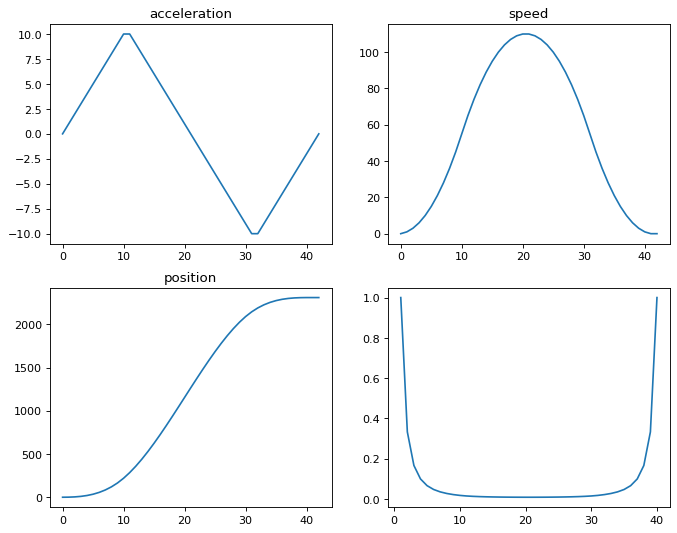

In [242]:
fig, ax = plt.subplots(2,2, dpi = 80, figsize = (10,8))
axis = ax[0,0]
axis.plot(np.arange(len(accel)), accel)
axis.set_title('acceleration')
axis = ax[0,1]
axis.plot(np.arange(len(accel)), np.cumsum(accel))
axis.set_title('speed')
axis = ax[1,0]
axis.plot(np.arange(len(accel)), np.cumsum(np.cumsum(accel)))
axis.set_title('position')
axis = ax[1,1]
axis.plot(np.arange(len(accel)), 1/(np.cumsum(accel)))

In [243]:
intervals = 1/np.cumsum(accel)
print(intervals)

[       inf 1.         0.33333333 0.16666667 0.1        0.06666667
 0.04761905 0.03571429 0.02777778 0.02222222 0.01818182 0.01538462
 0.01351351 0.01219512 0.01123596 0.01052632 0.01       0.00961538
 0.00934579 0.00917431 0.00909091 0.00909091 0.00917431 0.00934579
 0.00961538 0.01       0.01052632 0.01123596 0.01219512 0.01351351
 0.01538462 0.01818182 0.02222222 0.02777778 0.03571429 0.04761905
 0.06666667 0.1        0.16666667 0.33333333 1.                inf
        inf]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [244]:
steps_motor_a = 50
steps_motor_b = 70

In [245]:
accel_phase_length = 30

[10.          4.11764706  1.89189189  1.04477612  0.65420561  0.44585987
  0.32258065  0.24390244  0.19607843  0.16736402  0.14869888  0.13605442
  0.12738854  0.12158055  0.1179941   0.11627907  0.11627907  0.1179941
  0.12158055  0.12738854  0.13605442  0.14869888  0.16736402  0.19607843
  0.24390244  0.32258065  0.44585987  0.65420561  1.04477612  1.89189189
  4.11764706 10.         10.        ]
49.70460328246996
4.023772181892394
200.0
[40.23772182 16.56847369  7.61254197  4.20394109  2.63237432  1.79403855
  1.29799103  0.98140785  0.78897494  0.67343467  0.59833044  0.547452
  0.51258244  0.48921242  0.47478138  0.46788049  0.46788049  0.47478138
  0.48921242  0.51258244  0.547452    0.59833044  0.67343467  0.78897494
  0.98140785  1.29799103  1.79403855  2.63237432  4.20394109  7.61254197
 16.56847369 40.23772182 40.23772182]


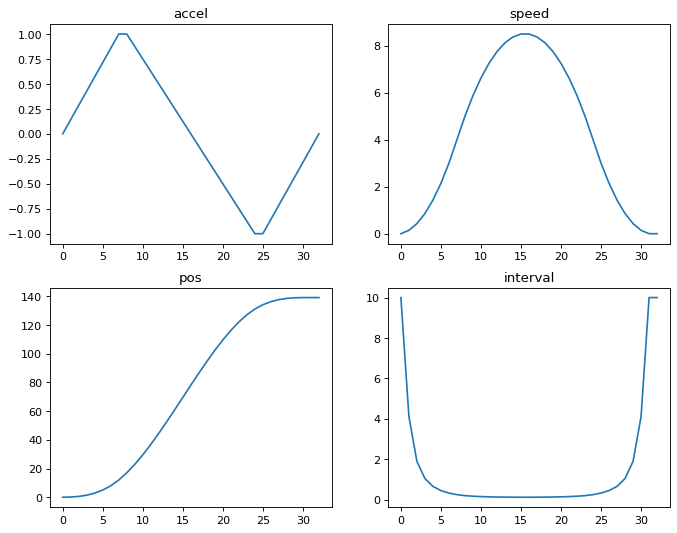

In [271]:
def plot_motor_speed(steps, accel_phase):
    accel_jerk_up = np.linspace(0, 1, accel_phase/2)
    accel_jerk_down = np.linspace(1, 0, accel_phase/2)
    


    
    if (steps > accel_phase * 2):
        accel = np.append(accel_jerk_up, accel_jerk_down)
        accel = np.append(accel, np.zeros(steps-2*accel_phase))
        accel = np.append(accel, -accel_jerk_up)
        accel = np.append(accel, -accel_jerk_down)
        speed = np.cumsum(accel)
        pos = np.cumsum(speed)
        
        intervals = 1/(speed+0.1)
        
        fig, ax = plt.subplots(2,2, dpi = 80, figsize = (10,8))
        axis = ax[0,0]
        axis.plot(np.arange(len(accel)), accel)
        axis.set_title('accel')
        axis = ax[0,1]
        axis.plot(np.arange(len(speed)), speed)
        axis.set_title('speed')
        axis = ax[1,0]
        axis.plot(np.arange(len(pos)), pos)
        axis.set_title('pos')
        axis = ax[1,1]
        axis.plot(np.arange(len(intervals)), intervals)
        axis.set_title('interval')
        print(intervals)

        
    if (steps <= accel_phase*2):
        l = steps/4
        accel = np.append(np.linspace(0,1,l), np.linspace(1,-1,l*2))
        accel = np.append(accel, np.linspace(-1,0,l))
        speed = np.cumsum(accel)
        pos = np.cumsum(speed)
        intervals = 1/(speed+0.1)

        
        fig, ax = plt.subplots(2,2, dpi = 80, figsize = (10,8))
        axis = ax[0,0]
        axis.plot(np.arange(len(accel)), accel)
        axis.set_title('accel')
        axis = ax[0,1]
        axis.plot(np.arange(len(speed)), speed)
        axis.set_title('speed')
        axis = ax[1,0]
        axis.plot(np.arange(len(pos)), pos)
        axis.set_title('pos')
        axis = ax[1,1]
        axis.plot(np.arange(len(intervals)), intervals)
        axis.set_title('interval')
        print(intervals)
        print(np.cumsum(intervals)[-1])
        
        defined_length = 200
        correction_factor = defined_length/np.cumsum(intervals)[-1]
        intervals *= correction_factor
        
        print(correction_factor)
        print(np.cumsum(intervals)[-1])
        print(intervals)
        
plot_motor_speed(34, 100)